# Estimación de una distribución

In [ ]:
import numpy as np
from matplotlib import pyplot 
from numpy.random import normal
from scipy.stats import norm

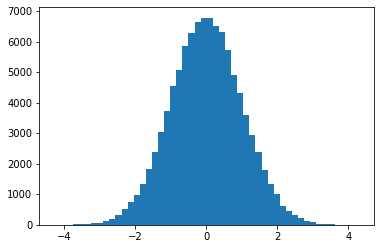

In [ ]:
# generador aleatorio basado en la distribución normal
sample = normal(size=100000) 
pyplot.hist(sample, bins=50) 
pyplot.show()

## Estimación paramétrica

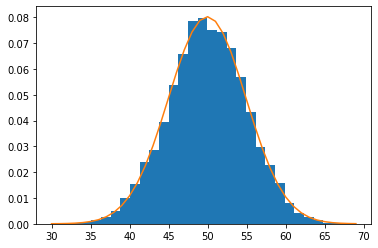

In [ ]:
#Simulacion
sample = normal(loc=50, scale=5, size=10000) # mu = 50, sigma = 5

# Teoría
dist = norm(sample.mean(), sample.std())
values = [value for value in range(30, 70)]
probabilities = [dist.pdf(value) for value in values]

# Graficos
pyplot.hist(sample, bins=30, density=True)
pyplot.plot(values, probabilities)
pyplot.show()

# Estimación no paramétrica

No fuerzo parámetros de una única distribución si no que hago una combinación de varias distribuciones.

`Kernel Density estimation` 
* [parámetro de suavizado]: smoothing parameter (bandwidth)
* [función base]: basis function (kernel)

https://scikit-learn.org/stable/modules/density.html

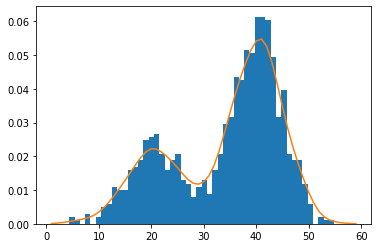

In [ ]:
from numpy import hstack # juntar arreglos
from sklearn.neighbors import KernelDensity

#construimos una distribución bimodal
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))

# Creamos y ajustamos el modelo Kernel Density
model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample), 1)) # (100,) -> (100,1)
model.fit(sample)

# Obtenemos los valores del modelo
values = np.asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values) #probabilidad logarítmica
probabilities = np.exp(probabilities)  # inversión de probabilidad


pyplot.hist(sample, bins=50, density=True) 
pyplot.plot(values[:], probabilities)
pyplot.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b06e2ad7-2e73-4529-91c1-8e44f8b5881a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>